In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define paths for corrosion and no-corrosion images
corrosion_path = "D:/Work/Corrosion_Detection/Web_Scrapping/Corrosion"
nocorrosion_path = "D:/Work/Corrosion_Detection/Web_Scrapping/Nocorrosion"

In [3]:
# Define preprocessing parameters
IMG_SIZE = (256, 256)  # Resize images to 256x256
SAVE_PATH = "D:/Work/Corrosion_Detection/Preprocessed_Dataset"  # Path to save preprocessed images

# Create directories for saving preprocessed images
os.makedirs(os.path.join(SAVE_PATH, "Corrosion"), exist_ok=True)
os.makedirs(os.path.join(SAVE_PATH, "Nocorrosion"), exist_ok=True)

In [4]:
# Function to preprocess images
def preprocess_and_save_images(input_folder, output_folder, label):
    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        
        try:
            # Load the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMG_SIZE)  # Resize
            
            # Convert to grayscale (optional)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Normalize pixel values (scale between 0 and 1)
            img = img / 255.0  

            # Save preprocessed image
            save_path = os.path.join(output_folder, img_name)
            cv2.imwrite(save_path, (img * 255).astype(np.uint8))  # Convert back to 0-255 range before saving
            
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

In [5]:
# Preprocess and save corrosion images
preprocess_and_save_images(corrosion_path, os.path.join(SAVE_PATH, "Corrosion"), "Corrosion")

# Preprocess and save no-corrosion images
preprocess_and_save_images(nocorrosion_path, os.path.join(SAVE_PATH, "Nocorrosion"), "Nocorrosion")

print("✅ Preprocessing Complete! Images saved in 'Preprocessed_Dataset' folder.")

✅ Preprocessing Complete! Images saved in 'Preprocessed_Dataset' folder.


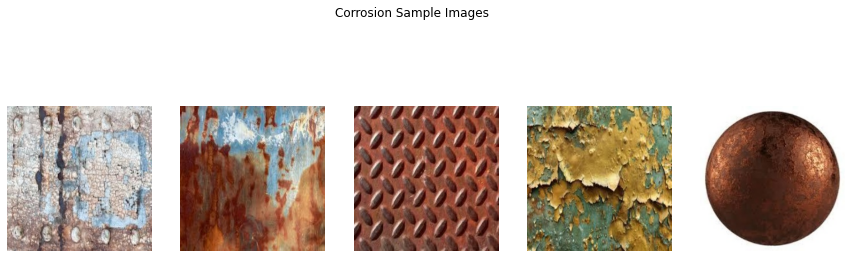

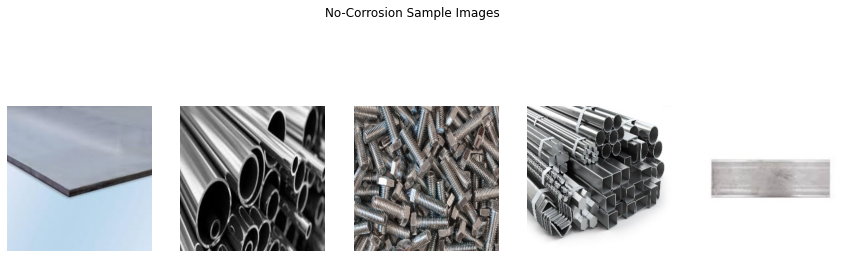

In [6]:
# Preview some preprocessed images
def visualize_sample_images(folder, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, img_name in enumerate(os.listdir(folder)[:5]):
        img = cv2.imread(os.path.join(folder, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.suptitle(title)
    plt.show()

# Show some sample images
visualize_sample_images(os.path.join(SAVE_PATH, "Corrosion"), "Corrosion Sample Images")
visualize_sample_images(os.path.join(SAVE_PATH, "Nocorrosion"), "No-Corrosion Sample Images")

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Define Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
# Paths
augmented_path = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Augmented_Dataset"
os.makedirs(augmented_path, exist_ok=True)

In [11]:
input_folder = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Corrosion"  # Change this to your actual image folder
output_folder = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Augmented_Dataset/Corrosion"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn’t exist

In [14]:
# Loop through all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)  # Read image

    if img is None:
        print(f"❌ Error: Could not load image {img_name}. Skipping...")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (matplotlib expects RGB)
    img = cv2.resize(img, (224, 224))  # Resize
    img = img.astype(np.float32) / 255.0  # Normalize to 0-1 range
    img = np.expand_dims(img, axis=0)  # Expand dimensions for augmentation

    # Generate and save augmented images
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0]  # Extract the image from the batch

        # Convert back to uint8 (0-255) if necessary
        augmented_img = np.clip(augmented_img * 255, 0, 255).astype(np.uint8)

        # Save the augmented image
        save_path = os.path.join(output_folder, f"aug_{i}_{img_name}")
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))

        # Display the augmented image
        #plt.figure(figsize=(4, 4))
        #plt.imshow(augmented_img)
        #plt.axis("off")
        #plt.title(f"Augmented Image {i+1}")
        #plt.show()

        i += 1
        if i > 3:  # Generate only 3 augmented images per input image
            break

print("✅ Image augmentation completed successfully!")

✅ Image augmentation completed successfully!


In [15]:
input_folder = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Nocorrosion"  # Change this to your actual image folder
output_folder = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Augmented_Dataset/Nocorrosion"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn’t exist

# Loop through all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)  # Read image

    if img is None:
        print(f"❌ Error: Could not load image {img_name}. Skipping...")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (matplotlib expects RGB)
    img = cv2.resize(img, (224, 224))  # Resize
    img = img.astype(np.float32) / 255.0  # Normalize to 0-1 range
    img = np.expand_dims(img, axis=0)  # Expand dimensions for augmentation

    # Generate and save augmented images
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0]  # Extract the image from the batch

        # Convert back to uint8 (0-255) if necessary
        augmented_img = np.clip(augmented_img * 255, 0, 255).astype(np.uint8)

        # Save the augmented image
        save_path = os.path.join(output_folder, f"aug_{i}_{img_name}")
        cv2.imwrite(save_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))

        # Display the augmented image
        #plt.figure(figsize=(4, 4))
        #plt.imshow(augmented_img)
        #plt.axis("off")
        #plt.title(f"Augmented Image {i+1}")
        #plt.show()

        i += 1
        if i >= 3:  # Generate only 3 augmented images per input image
            break

print("✅ Image augmentation completed successfully!")

✅ Image augmentation completed successfully!
